In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("forecastXMLNew.csv")

In [3]:
df.head()

,Provider,Location,One_Day_Ahead,DateOne,Three_Days_Ahead,DateThree,Five_Days_Ahead,DateFive,Date_Scraped
0,MetEireann,Donegal,0.0,2020-03-28,0.0,2020-03-30,3.5,2020-04-01,2020-03-27
1,MetEireann,Donegal,5.6,2020-03-07,17.3,2020-03-09,5.4,2020-03-11,2020-03-06
2,MetEireann,Donegal,0.0,2020-03-13,4.1,2020-03-15,18.8,2020-03-17,2020-03-12
3,MetEireann,Donegal,6.9,2020-02-03,0.0,2020-02-05,0.0,2020-02-07,2020-02-02
4,MetEireann,Donegal,7.5,2020-02-17,7.7,2020-02-19,19.7,2020-02-21,2020-02-16


In [4]:
actuals = pd.read_csv("./observedXML.csv")

In [5]:
actuals.head()

,date,rain,location
0,2020-01-07,2.4,Donegal
1,2020-01-08,2.5,Donegal
2,2020-01-09,0.8,Donegal
3,2020-01-10,2.6,Donegal
4,2020-01-11,17.5,Donegal


In [6]:
actuals = actuals.rename(columns={'date':'Date',
                          'rain':'Amount',
                          'location':'Location'})

In [7]:
OneDayAhead = df[['Provider','Location', 'One_Day_Ahead', 'DateOne']].copy()

In [8]:
OneDayAhead['Date'] = pd.to_datetime(OneDayAhead['DateOne'])

In [9]:
OneDayAhead = OneDayAhead.sort_values(by='DateOne')

In [10]:
actuals['Date']= pd.to_datetime(actuals['Date'])

In [11]:
start_date = '2020-01-07'
end_date = '2020-03-31'
mask = (actuals['Date'] >= start_date) & (actuals['Date'] <= end_date)

In [12]:
actual = actuals.loc[mask]

In [13]:
result = pd.merge(OneDayAhead, actual, on=['Date', 'Location'])

In [14]:
display(result)

,Provider,Location,One_Day_Ahead,DateOne,Date,Amount
0,MetEireann,Dublin,0.0,2020-01-07,2020-01-07,0.3
1,MetEireann,Wexford,0.0,2020-01-07,2020-01-07,1.3
2,MetEireann,Wexford,0.0,2020-01-10,2020-01-10,0.2
3,MetEireann,Dublin,0.1,2020-01-10,2020-01-10,0.2
4,MetEireann,Dublin,10.5,2020-01-14,2020-01-14,3.5
...,...,...,...,...,...,...
236,MetEireann,Wexford,0.0,2020-03-30,2020-03-30,0.0
237,MetEireann,Wexford,0.0,2020-03-31,2020-03-31,0.0
238,MetEireann,Donegal,0.1,2020-03-31,2020-03-31,0.2
239,MetEireann,Dublin,0.3,2020-03-31,2020-03-31,0.0


In [15]:
result["Difference"] = result['One_Day_Ahead'] - result['Amount']

In [16]:
import matplotlib.pyplot as plt  

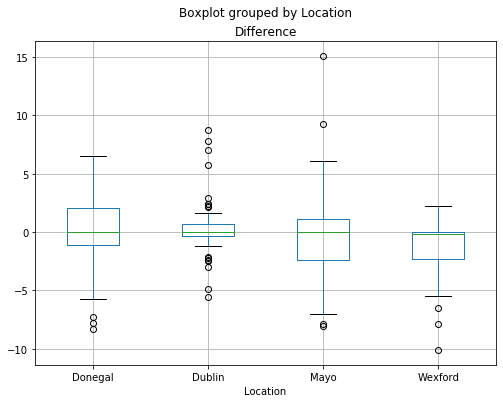

In [17]:
boxplotOne = result.boxplot(by = 'Location', column = ['Difference'], figsize=(8, 6), )

In [18]:
from sklearn.metrics import mean_absolute_error
OneDayMAE = mean_absolute_error(result["Amount"], result["One_Day_Ahead"])
OneDayMAE

1.9319502074688797

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(result["Amount"], result["One_Day_Ahead"]))
rms # so this means on average there is a +- of 3.8 for millimiters 

3.024190162850021

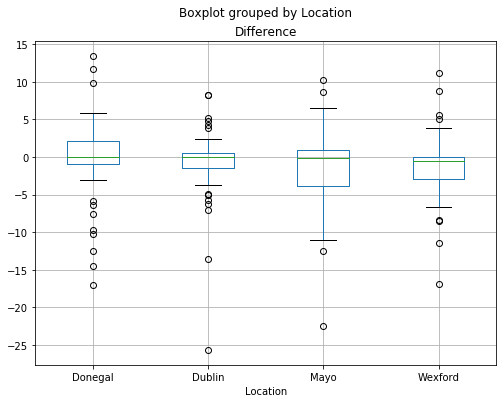

In [20]:
#ThreeDayAhead 
ThreeDayAhead = df[['Provider','Location', 'Three_Days_Ahead', 'DateThree']].copy()
ThreeDayAhead['Date'] = pd.to_datetime(ThreeDayAhead['DateThree'])
resultThree = pd.merge(ThreeDayAhead, actual, on=['Date', 'Location'])
resultThree["Difference"] = resultThree['Three_Days_Ahead'] - resultThree['Amount']
boxplotThree = resultThree.boxplot(by = 'Location', column = ['Difference'], figsize=(8, 6))



In [21]:
rmsThree = sqrt(mean_squared_error(resultThree["Amount"], resultThree["Three_Days_Ahead"]))
rmsThree

5.065053202928658

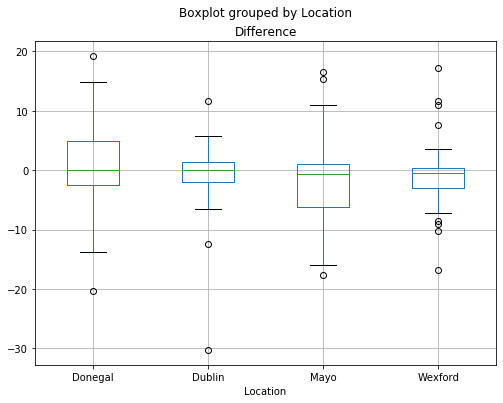

In [22]:
#FiveDayAhead 
FiveDayAhead = df[['Provider','Location', 'Five_Days_Ahead', 'DateFive']].copy()
FiveDayAhead['Date'] = pd.to_datetime(FiveDayAhead['DateFive'])
resultFive = pd.merge(FiveDayAhead, actual, on=['Date', 'Location'])
resultFive["Difference"] = resultFive['Five_Days_Ahead'] - resultFive['Amount']
boxplotFive = resultFive.boxplot(by = 'Location', column = ['Difference'], figsize=(8, 6))

In [23]:
rmsFive = sqrt(mean_squared_error(resultFive["Amount"], resultFive["Five_Days_Ahead"]))
rmsFive

6.11665122613855

In [24]:
rms

3.024190162850021

In [25]:
rmsThree

5.065053202928658

In [26]:
rmsFive

6.11665122613855

In [28]:
result['Threshold'] = np.where(result['Amount'] > result["Amount"].mean(), 'overThreshold', 'underThreshold')

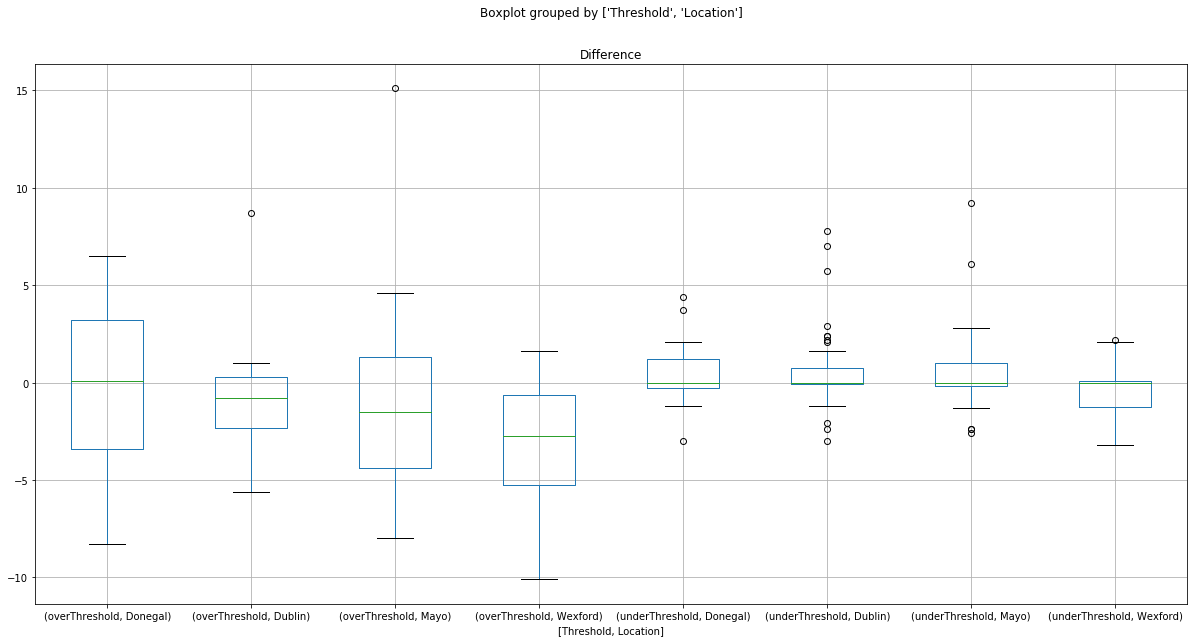

In [29]:
boxplotCounties = result.boxplot(by = ['Threshold', 'Location'], column = ['Difference'], figsize=(20, 10))

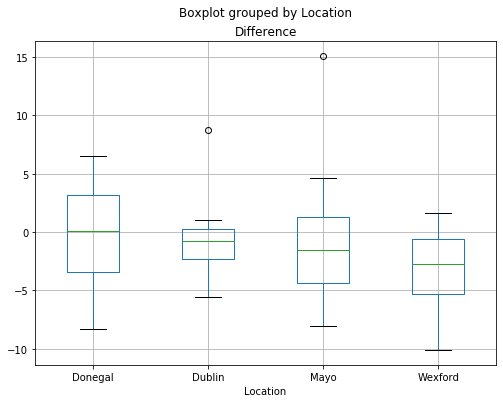

In [34]:
OverOnly = result.loc[result["Threshold"]== 'overThreshold'].copy()
boxplotOver = OverOnly.boxplot(by = 'Location', column = ['Difference'], figsize=(8, 6))

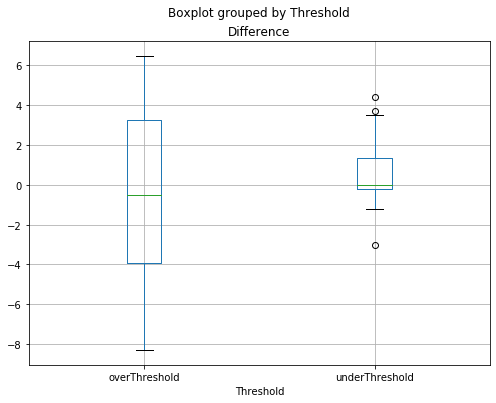

In [31]:
DonegalOnly = result.loc[result["Location"]== 'Donegal'].copy()
DonegalOnly['Threshold'] = np.where(DonegalOnly['Amount'] > DonegalOnly["Amount"].mean(), 'overThreshold', 'underThreshold')
boxplotBig = DonegalOnly.boxplot(by = 'Threshold', column = ['Difference'], figsize=(8, 6))